In [13]:
import pandas as pd

In [14]:
from matplotlib import pyplot as plt

In [15]:
data = pd.read_csv('results.csv')

In [16]:
data

,Name,Accuracy,Loss
0,Mean of Input and Output Neurons with 1 layers,0.9750,0.078227
1,Mean of Input and Output Neurons with 2 layers,0.9754,0.092235
2,Mean of Input and Output Neurons with 3 layers,0.9770,0.080212
3,Mean of Input and Output Neurons with 4 layers,0.9779,0.082854
4,Mean of Input and Output Neurons with 5 layers,0.9757,0.091280
...,...,...,...
106,5 Neurons per Layer with 1 layers,0.8836,0.413201
107,5 Neurons per Layer with 2 layers,0.8765,0.443898
108,5 Neurons per Layer with 3 layers,0.8709,0.435973
109,5 Neurons per Layer with 4 layers,0.8165,0.594204


In [17]:
names = data['Name']
accuracy = data['Accuracy']
loss = data['Loss']

In [18]:
na = data[['Name', 'Accuracy']]
nl = data[['Name', 'Loss']]

In [24]:
ba = pd.Series(dtype='float64') # ba = bad accuracy
ba_n = pd.Series(dtype='float64') # ba_n = bad accuracy names
ga = pd.Series(dtype='float64') # ga = good accuracy
ga_n = pd.Series(dtype='float64') # ga_n = good accuracy names

In [25]:
index_num_ba = 0
index_ba = []
index_num_ga = 0
index_ga = []
data_number = 0

for a in na['Accuracy']:
    if a < 0.97:
        index_ba.append(index_num_ba)
        index_num_ba += 1
        ba = ba.append(pd.Series([a]))
        ba = ba.set_axis(index_ba)
        data_name = names[data_number]
        ba_n = ba_n.append(pd.Series(data_name))
        ba_n = ba_n.set_axis(index_ba)
    else:
        index_ga.append(index_num_ga)
        index_num_ga += 1
        ga = ga.append(pd.Series([a]))
        ga = ga.set_axis(index_ga)
        data_name = names[data_number]
        ga_n = ga_n.append(pd.Series(data_name))
        ga_n = ga_n.set_axis(index_ga)
        
    data_number += 1
        
ga_n

C:\Users\dbsho\AppData\Local\Temp\ipykernel_18812\1307891693.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ga = ga.append(pd.Series([a]))
C:\Users\dbsho\AppData\Local\Temp\ipykernel_18812\1307891693.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ga_n = ga_n.append(pd.Series(data_name))
C:\Users\dbsho\AppData\Local\Temp\ipykernel_18812\1307891693.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ga = ga.append(pd.Series([a]))
C:\Users\dbsho\AppData\Local\Temp\ipykernel_18812\1307891693.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ga_n = ga_n.append(pd.Series(data_name))
C:\Users\dbsho\AppData\Local\Temp\ipyker

0     Mean of Input and Output Neurons with 1 layers
1     Mean of Input and Output Neurons with 2 layers
2     Mean of Input and Output Neurons with 3 layers
3     Mean of Input and Output Neurons with 4 layers
4     Mean of Input and Output Neurons with 5 layers
                           ...                      
63                   20% Input Neurons with 5 layers
64                   10% Input Neurons with 2 layers
65                   10% Input Neurons with 3 layers
66                   10% Input Neurons with 4 layers
67                   10% Input Neurons with 5 layers
Length: 68, dtype: object

In [27]:
frame_ba = {'Name': ba_n, 'Accuracy': ba}
ba_df = pd.DataFrame(frame_ba)
ba_df = ba_df.sort_values(by=['Accuracy'], ascending=False)
ba_df = ba_df.set_axis(index_ba)
ba_s = ba_df['Accuracy'] # ba_s = bad accuracy sorted
ba_ns = ba_df['Name'] # ba_ns = bad accuracy name sorted

In [31]:
frame_ga = {'Name': ga_n, 'Accuracy': ga}
ga_df = pd.DataFrame(frame_ga)
ga_df = ga_df.sort_values(by=['Accuracy'], ascending=False)
ga_df = ga_df.set_axis(index_ga)
ga_s = ga_df['Accuracy'] # ga_s = good accuracy sorted
ga_ns = ga_df['Name'] # ga_ns = good accuracy name sorted

0     0.9789
1     0.9786
2     0.9779
3     0.9779
4     0.9775
       ...  
63    0.9710
64    0.9709
65    0.9706
66    0.9703
67    0.9702
Name: Accuracy, Length: 68, dtype: float64

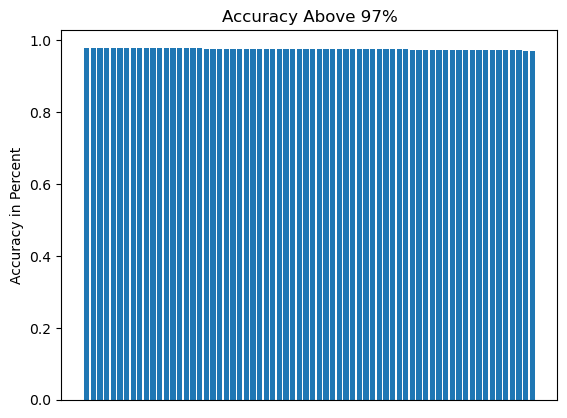

In [40]:
plt.bar(ga_ns, ga_s)
plt.title('Accuracy Above 97%')
plt.xlabel('')
plt.ylabel('Accuracy in Percent')
plt.xticks([])
plt.show()

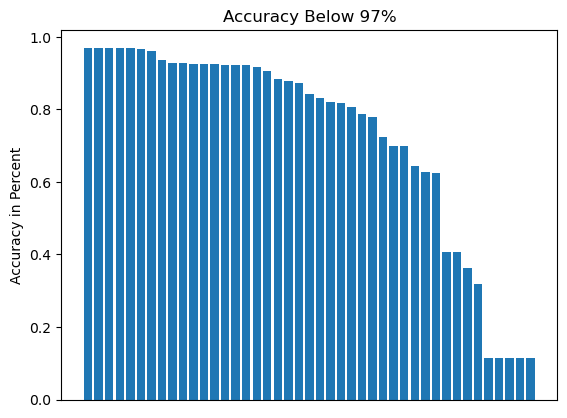

In [29]:
plt.bar(ba_ns, ba_s)
plt.title('Accuracy Below 97%')
plt.xlabel('')
plt.ylabel('Accuracy in Percent')
plt.xticks([])
plt.show()